<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SSD

In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 105MB/s] 


In [ ]:
model.eval() # 평가모델로 전환

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg' # 평가를 하기 위해 이미지 다운로드

--2024-09-02 00:13:24--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.131.9, 52.216.24.116, 54.231.196.33, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.131.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39.88K  --.-KB/s    in 0.06s   

2024-09-02 00:13:24 (635 KB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [ ]:
ig = Image.open('/content/000000037777.jpg')

In [ ]:
transform = T.ToTensor()
img = transform(ig)

In [ ]:
with torch.no_grad():
  pred = model([img]) # 리스트에 담으면 책 형태

In [ ]:
pred

[{'boxes': tensor([[296.8349,  76.6260, 352.0000, 230.0000],
          [137.9991, 127.7945, 197.8559, 192.3149],
          [ 47.7723, 174.8137, 291.8063, 226.5561],
          [201.0728, 182.3305, 256.9844, 220.3998],
          [ 49.4557,  85.3956,  83.2604, 164.0247],
          [188.0019, 128.9862, 229.9613, 177.4538],
          [109.9328,  95.1930, 132.2697, 165.9789],
          [ 96.1544, 103.4670, 113.3665, 178.7996],
          [ 71.0473,  87.6159,  93.4132, 168.6716],
          [ 25.6719, 207.0688,  96.7011, 229.5757],
          [ 45.0322, 201.5023, 115.4670, 227.5960],
          [125.2602, 133.3299, 161.7572, 192.3158],
          [211.5011, 186.0791, 229.8493, 202.1069],
          [  9.2319, 165.0959, 203.5730, 219.5669],
          [ 34.0497,  89.2359,  63.7728, 159.7142],
          [261.5966, 187.0260, 309.9577, 230.0000],
          [296.6909,  86.3788, 330.2977, 167.8974],
          [231.0472, 201.8315, 249.0667, 217.0303],
          [224.5060, 177.7315, 299.8907, 228.7035],
   

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [ ]:
bboxes, scores, labels = pred[0]['boxes'], pred[0]['scores'], pred[0]['labels']

In [ ]:
bboxes.shape

torch.Size([200, 4])

In [ ]:
scores.shape

torch.Size([200])

In [ ]:
labels.shape

torch.Size([200])

In [ ]:
num = torch.argwhere(scores>0.5).shape[0]
num

3

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
igg = cv2.imread('/content/000000037777.jpg')
for i in range(num):
  x1,y1,x2,y2 = bboxes[i].numpy().astype('int')
  igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.putText(igg, class_name,(x1,y1-10),font, 0.5,(255,0,0),1, cv2.LINE_AA)

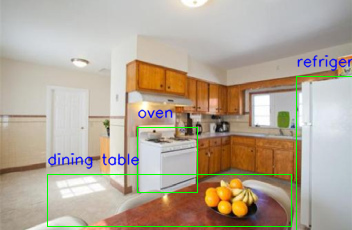

In [ ]:
cv2_imshow(igg)

OpenPose PyTorch

In [ ]:
!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 154 (delta 69), reused 152 (delta 67), pack-reused 0 (from 0)
Receiving objects: 100% (154/154), 20.18 MiB | 32.65 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/content/pytorch-openpose


In [ ]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

from src import model
from src import util
from src.body import Body
from src.hand import Hand

In [ ]:
!cp /kaggle/input/openpose-pretrained-models/body_pose_model.pth model
!cp /kaggle/input/openpose-pretrained-models/hand_pose_model.pth model

cp: cannot stat '/kaggle/input/openpose-pretrained-models/body_pose_model.pth': No such file or directory
cp: cannot stat '/kaggle/input/openpose-pretrained-models/hand_pose_model.pth': No such file or directory


In [ ]:
!pip install gdown
!gdown --id 11Szpu5855vBNb8lx5aPNY_HQ8PnOHxqS --output /content/pytorch-openpose/model/model.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=11Szpu5855vBNb8lx5aPNY_HQ8PnOHxqS
From (redirected): https://drive.google.com/uc?id=11Szpu5855vBNb8lx5aPNY_HQ8PnOHxqS&confirm=t&uuid=b6c13da5-0612-4bba-8639-513dfe804613
To: /content/pytorch-openpose/model/model.zip
100% 331M/331M [00:04<00:00, 70.8MB/s]


In [ ]:
%cd /content/pytorch-openpose/model
!pwd

/content/pytorch-openpose/model
/content/pytorch-openpose/model


In [ ]:
!unzip -q model.zip
!rm model.zip

In [ ]:
%cd /content/pytorch-openpose

/content/pytorch-openpose


In [ ]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

/content/pytorch-openpose/src/body.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = util.transfer(self.model, torch.load(model_path))
/content/pytorch-openp

In [ ]:
test_image = '/content/pytorch-openpose/images/demo.jpg'

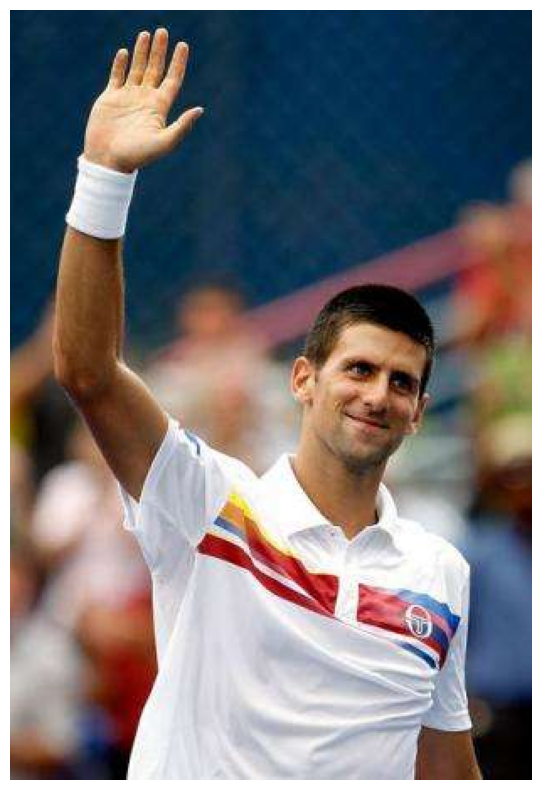

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread(test_image)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# enable GPU for acceleration
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons

25
2


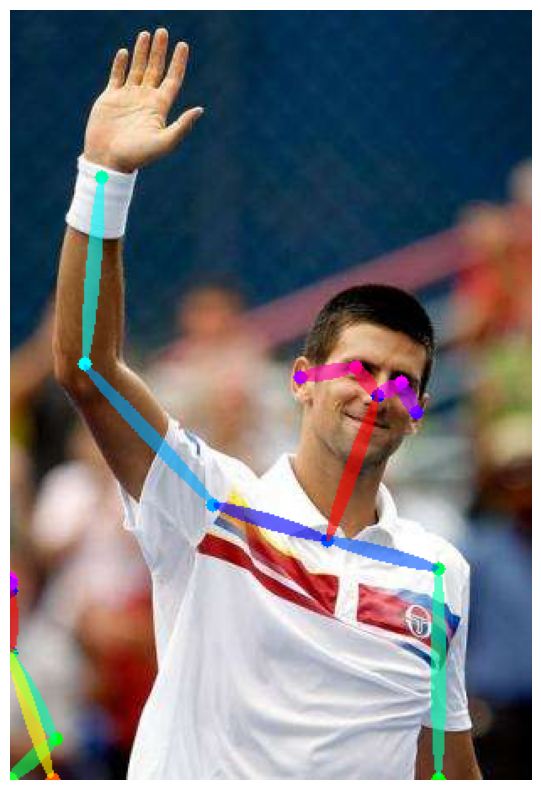

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

Detect Hand

In [ ]:
# detect hand
hands_list = util.handDetect(candidate, subset, oriImg)

all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks) # 예측을 하는 것

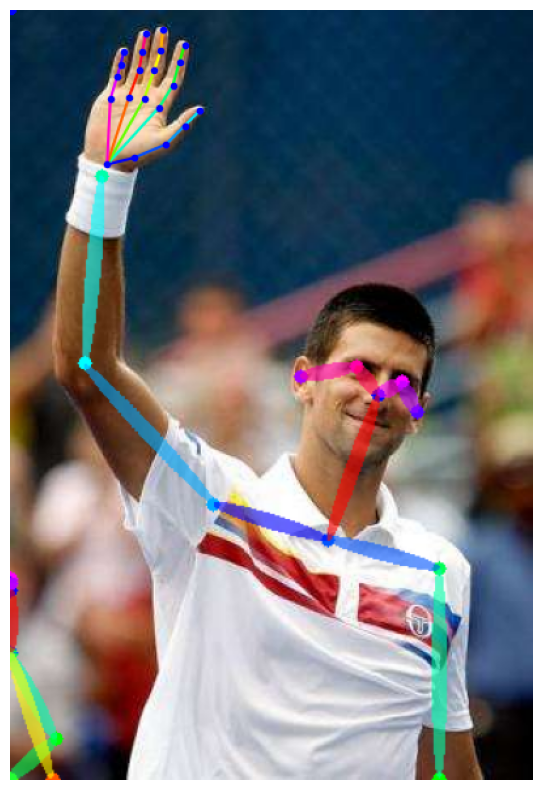

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()